In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### 1.Social network dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/kaggle/input/social-network-csv/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df=df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
281,35,61000,0
380,42,64000,0
90,22,81000,0
311,39,96000,1
53,35,23000,0


### Train test split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Purchased', axis=1),   
    df['Purchased'],                
    test_size=0.3,                  
    random_state=0                 
)
X_train.shape, X_test.shape


((280, 2), (120, 2))

### Standard Scaler

In [10]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [11]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [12]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


### Effect of Scaling

Text(0.5, 1.0, 'After Scaling')

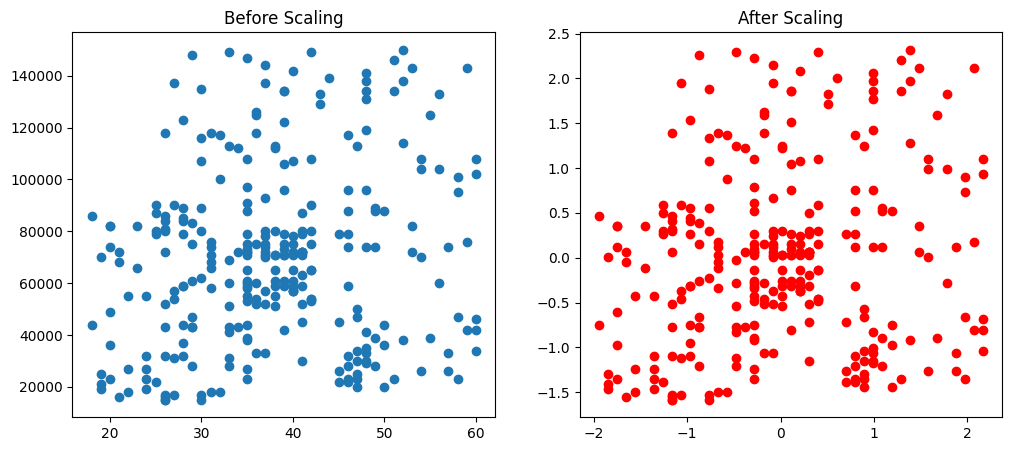

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color='red')
ax2.set_title("After Scaling")


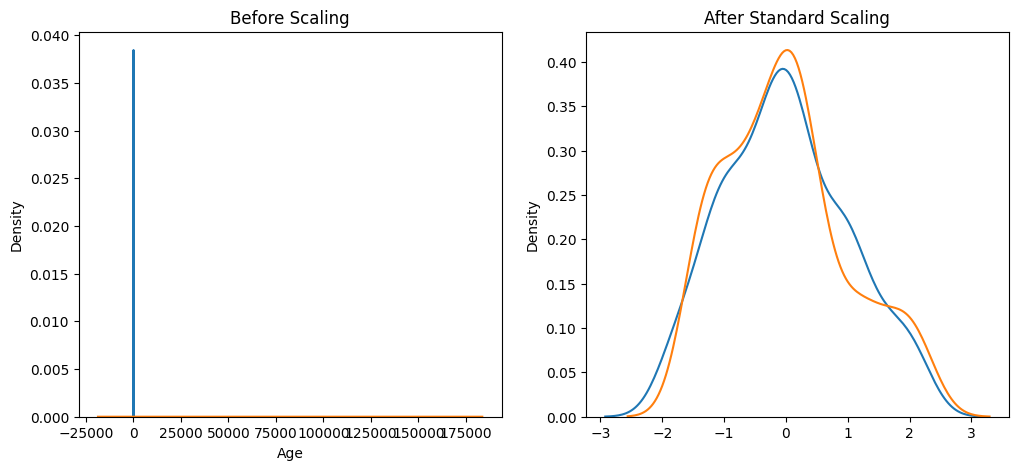

In [14]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], label='Age', ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], label='EstimatedSalary', ax=ax1)
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled[:, 0], label='Age', ax=ax2)
sns.kdeplot(X_train_scaled[:, 1], label='EstimatedSalary', ax=ax2)

plt.show()

### Comparison of Distributions

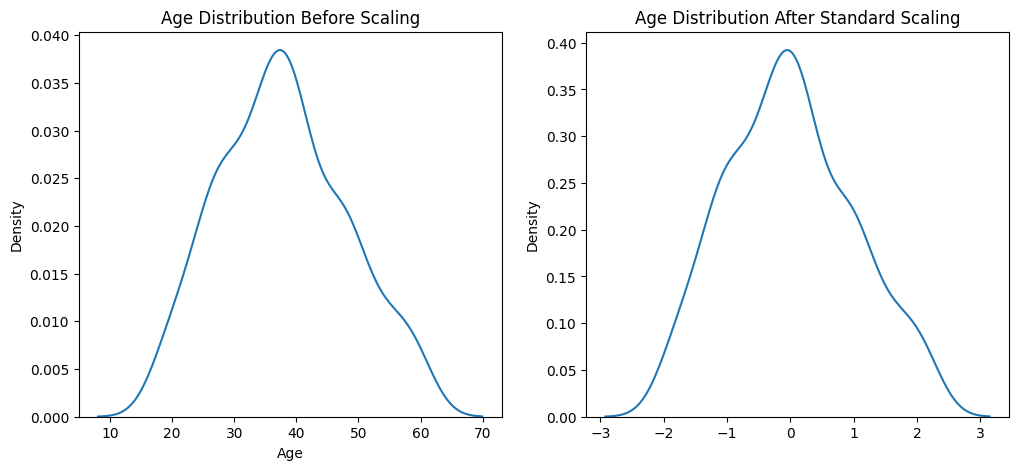

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled[:, 0], ax=ax2)  

plt.show()


#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_scaled, y_train)


LogisticRegression()

In [42]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [43]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [16]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


dt_scaled = DecisionTreeClassifier()
dt_scaled.fit(X_train_scaled, y_train)


DecisionTreeClassifier()

In [17]:
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [18]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


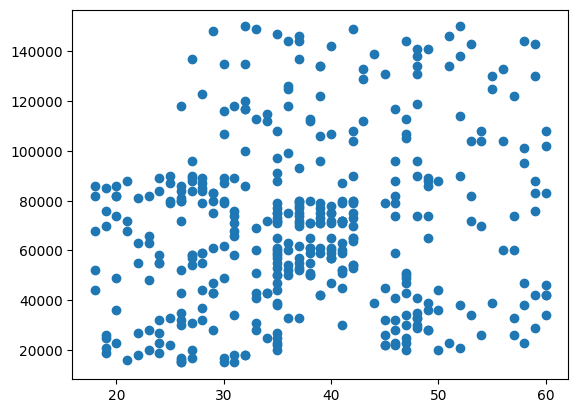

In [19]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Purchased', axis=1),   
    df['Purchased'],                
    test_size=0.3,                  
    random_state=0                 
)
X_train.shape, X_test.shape


((280, 2), (120, 2))

#### 2.wine dataset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/kaggle/input/wine-data1-csv/wine_data.csv')
df

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/kaggle/input/wine-data1-csv/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']
df

,Class label,Alcohol,Malic acid
0,class_label,alcohol,malic_acid
1,1,14.23,1.71
2,1,13.2,1.78
3,1,13.16,2.36
4,1,14.37,1.95
...,...,...,...
174,3,13.71,5.65
175,3,13.4,3.91
176,3,13.27,4.28
177,3,13.17,2.59


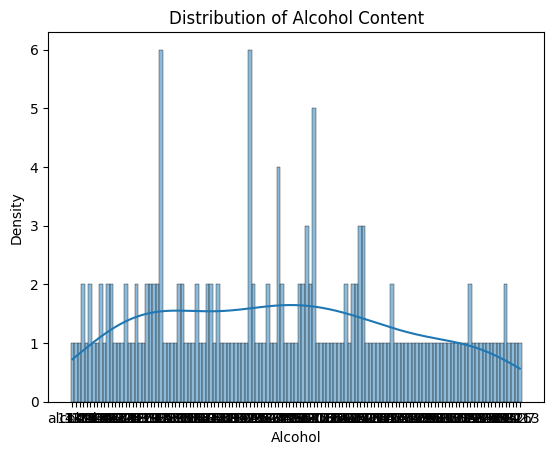

In [26]:

sns.histplot(df['Alcohol'], kde=True)  
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/kaggle/input/wine-data-csv/wine_data.csv", header=None, usecols=[0, 1, 2])

df

,0,1,2
0,class_label,alcohol,malic_acid
1,1,14.23,1.71
2,1,13.2,1.78
3,1,13.16,2.36
4,1,14.37,1.95
...,...,...,...
174,3,13.71,5.65
175,3,13.4,3.91
176,3,13.27,4.28
177,3,13.17,2.59


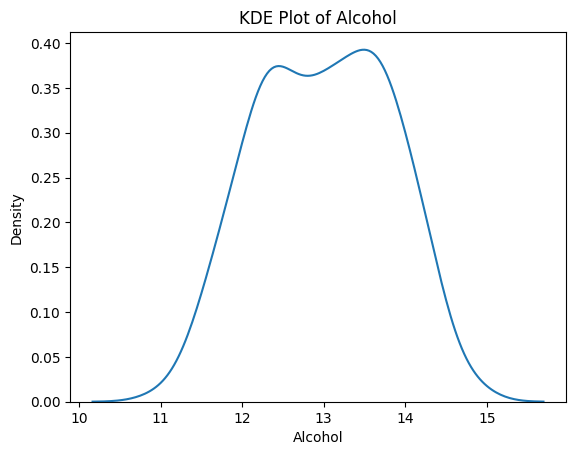

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/kaggle/input/wine-data1-csv/wine_data.csv", header=None, usecols=[0, 1, 2])
df.columns = ['Class label', 'alcohol', 'malic_acid']

df['alcohol'] = pd.to_numeric(df['alcohol'], errors='coerce')
df.dropna(subset=['alcohol'], inplace=True)
sns.kdeplot(df['alcohol'])
plt.title("KDE Plot of Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Density")
plt.show()


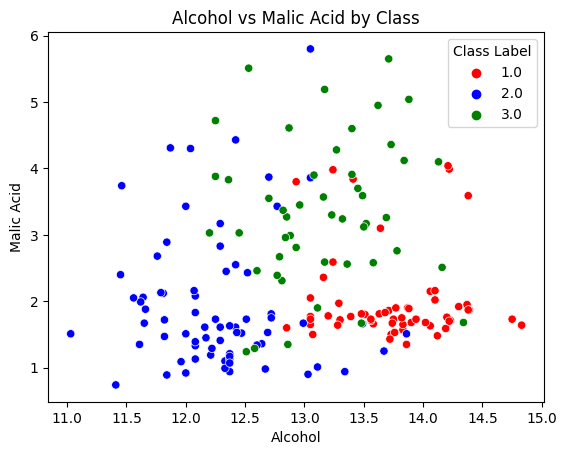

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/kaggle/input/wine-data1-csv/wine_data.csv", header=None, usecols=[0, 1, 2])

df.columns = ['Class label', 'alcohol', 'malic_acid']
df['alcohol'] = pd.to_numeric(df['alcohol'], errors='coerce')
df['malic_acid'] = pd.to_numeric(df['malic_acid'], errors='coerce')
df['Class label'] = pd.to_numeric(df['Class label'], errors='coerce')
df.dropna(subset=['alcohol', 'malic_acid', 'Class label'], inplace=True)

color_dict = {1: 'red', 2: 'blue', 3: 'green'}
sns.scatterplot(
    x=df['alcohol'],
    y=df['malic_acid'],
    hue=df['Class label'],
    palette=color_dict
)
plt.title("Alcohol vs Malic Acid by Class")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.legend(title="Class Label")

# Step 8: Show the plot
plt.show()


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Class label', axis=1),   
    df['Class label'],                
    test_size=0.3,                  
    random_state=0                 
)
X_train.shape, X_test.shape


((124, 2), (54, 2))

#### Min Max Scaler

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
np.round(X_train.describe(),1)



,alcohol,malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


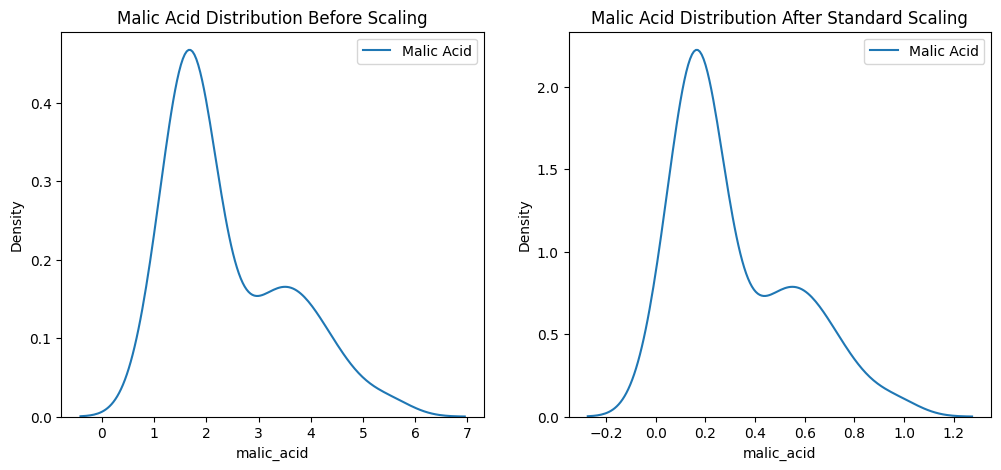

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("Malic Acid Distribution Before Scaling")
sns.kdeplot(X_train['malic_acid'], ax=ax1, label="Malic Acid")
ax1.legend()
ax2.set_title("Malic Acid Distribution After Standard Scaling")
sns.kdeplot(X_train_scaled['malic_acid'], ax=ax2, label="Malic Acid")
ax2.legend()

plt.show()


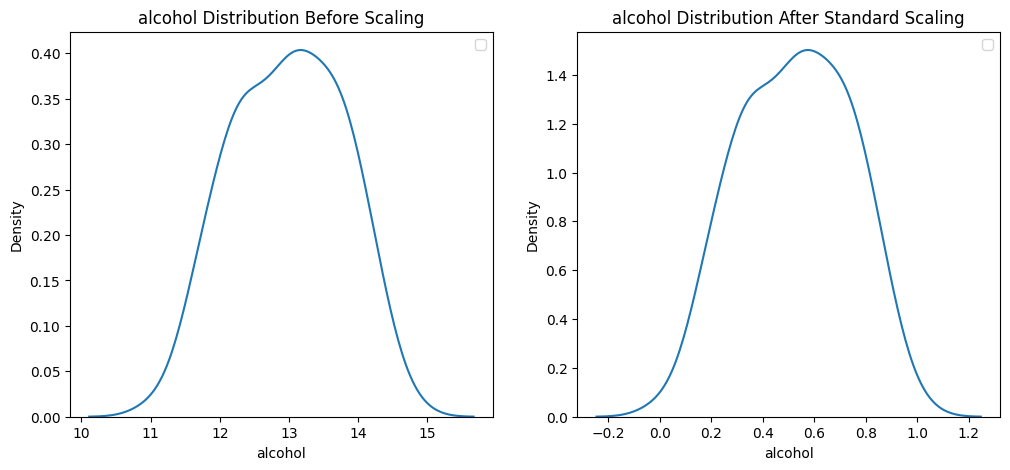

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("alcohol Distribution Before Scaling")
sns.kdeplot(X_train['alcohol'], ax=ax1)
ax1.legend()
ax2.set_title("alcohol Distribution After Standard Scaling")
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2)
ax2.legend()

plt.show()